#### Tidying up old exploratory scripts Mar 2017
added extra stopwords from feature_extraction of terms to 'clean' up the vocab list  
Ref: recipes_runNLTK_LDA_ClassifyPrepDiff_FindCompTokens_v0.ipynb

### Pipeline for performing NLP and running LDA topic modelling on 'cleaner' recipes data 

In [ ]:
## for plotting 
# % matplotlib inline
# import matplotlib.pyplot as plt
# import seaborn as sns

In [1]:
import numpy as np
import pandas as pd


In [2]:
filepath = '/Users/hrm/Documents/Dropbox/DSrelated/Metis/recipes/bbc_goodfood_recipes_pickles/'

In [3]:
DF0 = pd.read_pickle(filepath+'BBCgoodfood_10081recipesNlinks.pkl')

ErrorIDX12 = pd.read_csv(filepath + 'bbcgdfd_idxNOTcleaned12.csv', index_col=0)

### Exclude recipe where idx in Error list

In [4]:
recipeIDList = list(set(list(range(0,10081))).difference(ErrorIDX12.idx))

In [5]:
rTitle = DF0.iloc[recipeIDList].title.to_frame()#.reset_index()
rTitle.index = recipeIDList
rMethod =  DF0.iloc[recipeIDList].method.to_frame()#.reset_index()
rMethod.index = recipeIDList

In [6]:
ingred=[]
IngCnt = []
for id in recipeIDList:
    df1 = pd.read_pickle(filepath + 'bbcgdfd_'+str(id)+'_cleaned.pkl')
    
    tmp = [n for n in df1.name1 if pd.isnull(n)==False]  # name1 <-- cleaned ingredient CRF++ name
    
    ingred.append(' '.join(tmp))
    IngCnt.append([id, df1.shape[0]]) 

In [7]:
IngredCnt = pd.DataFrame(IngCnt, columns=['Ridx','Ningred'])
IngredCnt.index = recipeIDList

In [8]:
Ing0 = pd.DataFrame(ingred, columns=['ingred'], index=recipeIDList)
# Ing0.shape #10051 rows × 1 columns
# Ing0

In [9]:
# filepath = '/Users/hrm/Documents/Dropbox/DSrelated/Metis/recipes/bbc_goodfood_recipes_pickles/'
# DF0 = pd.read_pickle(filepath+'BBCgoodfood_10081recipesNlinks.pkl')

DF = DF0.iloc[recipeIDList].copy()

In [10]:
# DF.shape #10051 rows × 14 columns
DF.head()

,title,prepTime,cookTime,prepInfo,recipeInfo,recpYield,prepDifficulty,ingred,method,authorInfo,Nraters,Ratings,imgURL,recipeLink
0,Lemon drizzle cake,15.0,45.0,None,[freezable],Cuts into 10 slices,Easy,"[225g unsalted butter, softened, 225g caster s...",Heat oven to 180C/fan 160C/gas 4. Beat togethe...,Tana Ramsay,1455,4.689520,http://www.bbcgoodfood.com/sites/default/files...,http://www.bbcgoodfood.com/recipes/4942/lemon-...
1,Chilli con carne,70.0,NaN,None,[freezable],Serves 4,Easy,"[1 tbsp oil, 1 large onion, 1 red pepper, 2 ga...",Prepare your vegetables. Chop 1 large onion in...,Good Food,1007,4.764150,http://www.bbcgoodfood.com/sites/default/files...,http://www.bbcgoodfood.com/recipes/3228/chilli...
2,Ultimate chocolate cake,40.0,90.0,Plus baking and cooling time,[freezable],Cuts into 14 slices,Easy,"[200g good quality dark chocolate, about 60% c...",Butter a 20cm round cake tin (7.5cm deep) and ...,Angela Nilsen,971,4.695415,http://www.bbcgoodfood.com/sites/default/files...,http://www.bbcgoodfood.com/recipes/3092/ultima...
3,Best-ever brownies,NaN,NaN,"Ready in 1 hour, inc cooling (worth every minute)",[],Cuts into 16 squares or 32 triangles,More effort,"[185g unsalted butter, 185g best dark chocolat...",Cut 185g unsalted butter into smallish cubes a...,Orlando Murrin,803,4.809155,http://www.bbcgoodfood.com/sites/default/files...,http://www.bbcgoodfood.com/recipes/1223/bestev...
4,Yummy scrummy carrot cake,75.0,NaN,Including 40-45 minutes in the oven.,"[freezable, dairy-free]",Cuts into 15 slices,Easy,"[175g light muscovado sugar, 175ml sunflower o...",Preheat the oven to 180C/Gas 4/fan 160C. Oil a...,Mary Cadogan,789,4.668885,http://www.bbcgoodfood.com/sites/default/files...,http://www.bbcgoodfood.com/recipes/3229/yummy-...


In [ ]:
# DF.prepDifficulty.value_counts()
# Easy           8464
# More effort    1364
# A challenge     223
# Name: prepDifficulty, dtype: int64

In [11]:
Ing = pd.concat([rTitle.title,rMethod.method,Ing0, IngredCnt.Ningred, DF.prepTime, DF.cookTime, DF.prepDifficulty],axis=1)
# Ing.shape #(10051, 7)

In [ ]:
# Ing.prepTime.isnull().sum(), Ing.cookTime.isnull().sum()
# (1006, 1955)

In [12]:
Ing.prepTime = Ing.prepTime.fillna(Ing.prepTime.median())
Ing.cookTime = Ing.cookTime.fillna(Ing.cookTime.median())

In [ ]:
### (forNEWmodel) Ing.to_pickle('RecipesIng4modelling_Dataframe_mar2017.pkl')

### NLTK & NLP

In [ ]:
## Create list of 'stopwords' to ignore

In [ ]:
ingChars2ignore = ["'s",
                '/1lb', 
                '/4oz',
                '0.5*cucumb',
                '0.5*lemon',
                '100gram',
                '200gram',
                '250gram',
                '25gram',
                '50gram',
                'an-ees',
                'av-oh-car-doh',
                'bah-nah-nah',
                'beat-roota',
                'belli',
                'berri',
                'bio-yogurt',
                "bird's-ey",
                'bloo-bear-e',
                'bran-de',
                'corr-zjet',
                'cos',                
                'de',
                'dri',
                'egg-egg-yolk',
                'el',
                'fat-fre',   
                'fl-ow-er',
                'flouri',
                'frai',
                'ha-riss-ah',
                'halv',
                'hand',
                'huh-ne',
                'jinn',
                'ka-rot',
                'kay-per',   
                'keen-wah',   
                'klo-v',
                'le-mon',
                #'leftov',
                'ly-m',
                'of+0.5',
                'ol-iv',
                'oldest',
                'onli',
                'option',
                'or-ang',
                'oyl',
                'oz',
                'pa-preek-ah',
                'pee-kan',
                'poh-len-tah',
                'q-min',
                'ras',
                'ras-beh-re',
                'ree-cot-a',
                'roh-ket',
                'shaohs',
                'spin-atch',
                'toe-mart-oha',   
                'un-yun',
                'undi',
                'vod-ka']

In [ ]:
methdChars2ignore = ["'s",
                     '0.5cm',
                     '1-litr',
                     '1.5-litr',
                     '1.5cm',
                     '100g',
                     '100ml',
                     '10cm',
                     '12-hole',
                     '120c/100c',
                     '120c/gas',
                     '125ml',
                     '12cm',
                     '130c/gas',
                     '140c',
                     '140c/120c',
                     '140c/fan',
                     '140c/gas',
                     '140g',
                     '150c/130c',
                     '150c/fan',
                     '150g',
                     '150ml',
                     '15cm',
                     '160c',
                     '160c/',
                     '160c/140c',
                     '160c/fan',
                     '160c/gas',
                     '170c',
                     '170c/150c',
                     '170c/gas',
                     '180c',
                     '180c/',
                     '180c/160c',
                     '180c/convent',
                     '180c/fan',
                     '180c/gas',
                     '18cm',
                     '190c/170c',
                     '190c/fan',
                     '190c/gas',
                     '1cm',
                     '1kg',
                     '2-litr',
                     '2.5cm',
                     '200c',
                     '200c/',
                     '200c/180c',
                     '200c/fan',
                     '200c/gas',
                     '200g',
                     '200ml',
                     '20cm',
                     '220c/200c',
                     '220c/fan',
                     '220c/gas',
                     '22cm',
                     '230c/210c',
                     '23cm',
                     '240c/220c',
                     '24cm',
                     '250g',
                     '250ml',
                     '25cm',
                     '25g',
                     '28cm',
                     '2cm',
                     '2lb',
                     '300ml',
                     '30cm',
                     '350ml',
                     '35cm',
                     '3cm',
                     '4/fan',
                     '400ml',
                     '40cm',
                     '4cm',
                     '5/fan',
                     '500g',
                     '500ml',
                     '50g',
                     '50ml',
                     '5cm',
                     '5mm',
                     '6/fan',
                     '600ml',
                     '6cm',
                     '7/fan',
                     '75g',
                     '75ml',
                     '7cm',
                     '85g',
                     '8cm',
                     '900g',
                     '9cm',
                     'gas', 
                     'fan/', 
                     'fan/ga']

In [13]:
## Create list of 'stopwords' to ignore

import re
import os
import codecs

import nltk
# load nltk's English stopwords as variable called 'stopwords'
stopwords = nltk.corpus.stopwords.words('english')

import string

for s in string.punctuation: #'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'
    stopwords.extend(s)

    stopwords.extend(['serve','plus','handful','small'])
    
#     ##updated model removed more chars
#     stopwords.extend(ingChars2ignore)
#     stopwords.extend(methdChars2ignore)
    
    

In [ ]:
# stopwords

### Define tokenizers/Stemmer

In [14]:
## Define tokenizers/Stemmer

# load nltk's SnowballStemmer as variabled 'stemmer'
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")

# define here a tokenizer and stemmer which returns the set of stems in the text that it is passed

def tokenize_and_stem(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    stems = [stemmer.stem(t) for t in filtered_tokens]
    return stems


def tokenize_only(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    #tokens = [word.lower() for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    tokens = [word.lower() for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    return filtered_tokens


### LDA --  
Refs: 
- http://scikit-learn.org/stable/modules/decomposition.html  
- http://scikit-learn.org/stable/auto_examples/applications/topics_extraction_with_nmf_lda.html#sphx-glr-auto-examples-applications-topics-extraction-with-nmf-lda-py   

- https://github.com/bmabey/pyLDAvis/blob/master/notebooks/sklearn.ipynb  

LatentDirichletAllocation implements online variational Bayes algorithm and supports both online and batch update method.   
While batch method updates variational variables after each full pass through the data, online method updates variational variables from mini-batch data points.  

** *Note:**   
Although online method is guaranteed to converge to a local optimum point, the quality of the optimum point and the speed of convergence may depend on mini-batch size and attributes related to learning rate setting.  

*When LatentDirichletAllocation is applied on a “document-term” matrix, the matrix will be decomposed into a “topic-term” matrix and a “document-topic” matrix.   
While “topic-term” matrix is stored as components_ in the model, “document-topic” matrix can be calculated from transform method.*  

- http://stackoverflow.com/questions/22433884/python-gensim-how-to-calculate-document-similarity-using-the-lda-model  
- http://datascience.stackexchange.com/questions/678/what-are-some-standard-ways-of-computing-the-distance-between-documents  

- http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html   

In [15]:
from __future__ import print_function

# import pyLDAvis
# import pyLDAvis.sklearn
# pyLDAvis.enable_notebook()

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
# http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html

from sklearn.decomposition import LatentDirichletAllocation

In [16]:
itf_vectorizer = CountVectorizer(strip_accents = 'unicode',
                                 tokenizer=tokenize_and_stem, #tokenize_only,
                                 stop_words = stopwords, #
                                 lowercase = True,
                                 token_pattern = r'\b[a-zA-Z]{3,}\b',
                                 max_df = 0.5, 
                                 min_df = 15) #, 10
                                #ngram_range=(1, 3))

mtf_vectorizer = CountVectorizer(strip_accents = 'unicode',
                                 tokenizer=tokenize_and_stem, #tokenize_only,
                                 stop_words = stopwords, #
                                 lowercase = True,
                                 token_pattern = r'\b[a-zA-Z]{3,}\b',
                                 max_df = 0.5, 
                                 min_df = 20)#, 0.1
                                #ngram_range=(1, 3))



In [17]:
## Term Frequency

# Titledtm_tf = ttf_vectorizer.fit_transform(Ing.title)

Ingdtm_tf = itf_vectorizer.fit_transform(Ing.ingred)

Methoddtm_tf = mtf_vectorizer.fit_transform(Ing.method)

# print(Titledtm_tf.shape)
print(Ingdtm_tf.shape)  #(10051, 741) ##(10051, 678)
print(Methoddtm_tf.shape) #(10051, 1638) ##(10051, 1531)


(10051, 741)
(10051, 1638)


In [18]:
Itf_feature_names = itf_vectorizer.get_feature_names()  ## use with lda_tf.components_
Itf_feature_names # check for chars to add to stopwords ***


["'s",
 '/1lb',
 '/4oz',
 '0.5*cucumb',
 '0.5*lemon',
 '100gram',
 '200gram',
 '250gram',
 '25gram',
 '50gram',
 'agav',
 'ale',
 'all-butt',
 'allspic',
 'almond',
 'altern',
 'amaretti',
 'an-ees',
 'anchovi',
 'anis',
 'appl',
 'apricot',
 'artichok',
 'artichoke-heart',
 'asparagus',
 'aubergin',
 'av-oh-car-doh',
 'avocado',
 'babi',
 'back',
 'bacon',
 'bag',
 'baguett',
 'bah-nah-nah',
 'bake',
 'ball',
 'balsam',
 'banana',
 'bar',
 'barbecu',
 'barley',
 'base',
 'basil',
 'basmati',
 'bass',
 'bay',
 'bean',
 'beansprout',
 'beat-roota',
 'beef',
 'beer',
 'beetroot',
 'belli',
 'berri',
 'bicarbon',
 'big',
 'bio',
 'bio-yogurt',
 "bird's-ey",
 'biscuit',
 'black',
 'blackberri',
 'blanch',
 'block',
 'bloo-bear-e',
 'blossom',
 'blue',
 'blueberri',
 'boil',
 'bok-choi',
 'bone',
 'boneless',
 'bouillon',
 'bramley',
 'bran-de',
 'brandi',
 'bread',
 'breadcrumb',
 'breast',
 'brie',
 'brioch',
 'british',
 'broad',
 'broccoli',
 'brown',
 'brush',
 'brussel',
 'bulb',
 'bu

In [19]:
Mtf_feature_names = mtf_vectorizer.get_feature_names()  ## use with lda_tf.components_
Mtf_feature_names  # check for chars to add to stopwords ***


["'s",
 '0.5cm',
 '1-litr',
 '1.5-litr',
 '1.5cm',
 '100g',
 '100ml',
 '10cm',
 '12-hole',
 '120c/100c',
 '120c/gas',
 '125ml',
 '12cm',
 '130c/gas',
 '140c',
 '140c/120c',
 '140c/fan',
 '140c/gas',
 '140g',
 '150c/130c',
 '150c/fan',
 '150g',
 '150ml',
 '15cm',
 '160c',
 '160c/',
 '160c/140c',
 '160c/fan',
 '160c/gas',
 '170c',
 '170c/150c',
 '170c/gas',
 '180c',
 '180c/',
 '180c/160c',
 '180c/convent',
 '180c/fan',
 '180c/gas',
 '18cm',
 '190c/170c',
 '190c/fan',
 '190c/gas',
 '1cm',
 '1kg',
 '2-litr',
 '2.5cm',
 '200c',
 '200c/',
 '200c/180c',
 '200c/fan',
 '200c/gas',
 '200g',
 '200ml',
 '20cm',
 '220c/200c',
 '220c/fan',
 '220c/gas',
 '22cm',
 '230c/210c',
 '23cm',
 '240c/220c',
 '24cm',
 '250g',
 '250ml',
 '25cm',
 '25g',
 '28cm',
 '2cm',
 '2lb',
 '300ml',
 '30cm',
 '350ml',
 '35cm',
 '3cm',
 '4/fan',
 '400ml',
 '40cm',
 '4cm',
 '5/fan',
 '500g',
 '500ml',
 '50g',
 '50ml',
 '5cm',
 '5mm',
 '6/fan',
 '600ml',
 '6cm',
 '7/fan',
 '75g',
 '75ml',
 '7cm',
 '85g',
 '8cm',
 '900g',
 '9c

In [ ]:
## Term Frequency | inv Doc Frequency

# ttfidf_vectorizer = TfidfVectorizer(**ttf_vectorizer.get_params())
# Titledtm_tfidf = itfidf_vectorizer.fit_transform(Ing.title)

# itfidf_vectorizer = TfidfVectorizer(**itf_vectorizer.get_params())
# Ingdtm_tfidf = itfidf_vectorizer.fit_transform(Ing.ingred)

# mtfidf_vectorizer = TfidfVectorizer(**mtf_vectorizer.get_params())
# Methoddtm_tfidf = mtfidf_vectorizer.fit_transform(Ing.method)


# # print(Titledtm_tfidf.shape)
# print(Ingdtm_tfidf.shape)
# print(Methoddtm_tfidf.shape)

# (10051, 684)
# (10051, 1540)

### Run LDA

#### LDA on Ingredients

In [22]:
## rerun old without extra stopwords
ilda_tf = LatentDirichletAllocation(n_topics=100,random_state=0) 

# ##newModel
# ilda_tf = LatentDirichletAllocation(n_topics=100, #60, #50, #100, 
#                                     max_iter=200, #100, #200,
#                                     learning_method='batch', learning_offset=50.,
#                                     n_jobs=3, verbose=2,random_state=0) 



ilda_tf.fit(Ingdtm_tf)
print(ilda_tf.score(Ingdtm_tf))


/Users/hrm/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:508: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)


-12815321.4978


#### LDA on Methods

In [23]:
## rerun old without extra stopwords
mlda_tf = LatentDirichletAllocation(n_topics=80,random_state=0) 

# ##newModel
# mlda_tf = LatentDirichletAllocation(n_topics=80, #30, #40, #80,  
#                                     max_iter=200, #200,
#                                     learning_method='batch', learning_offset=50.,
#                                     n_jobs=3, verbose=2,random_state=0) 

mlda_tf.fit(Methoddtm_tf)
print(mlda_tf.score(Methoddtm_tf))


/Users/hrm/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:508: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)


-56684460.9688


### Retrieving Terms for Topics from model.components_

In [24]:
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic {0}:".format(topic_idx))
        print(" ".join([feature_names[i] 
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
    print()

#### Ingredient Topics & top terms

In [25]:
# old
print_top_words(ilda_tf, Itf_feature_names, 15)

Topic 0:
cos golden mozzarella frozen marmalad rapese almond chilli pecorino caster pheasant cordial vod-ka pouch cold
Topic 1:
nectarin candi colour firm berri asparagus pinch drizzl essenc korma whole littl wholewheat flatbread sea
Topic 2:
garlic clove chicken oliv breast onion stock parsley oregano tomato thigh leav butter boneless pearl
Topic 3:
flouri garam mussel huh-ne joint bio salsa rump buttermilk drain syrupagav ham melt teaspoon clear
Topic 4:
undi nutmeg dice roh-ket drain jar bah-nah-nah brioch rough parmesan pear flatleaf paneer puy courgett
Topic 5:
lean mayonnais spaghetti cardamom roh-ket /4oz almond jam smoke 0.5*cucumb crabmeat nest apricot english fig
Topic 6:
sugar caster lemon egg-whit cornflour whole butter fromag frai christma egg-yolk organ zest egg ice
Topic 7:
dill lamb sour minc turkey bag egg bouillon onion melt cutlet 0.5*lemon lemon cream flour
Topic 8:
mix herb pistachio berri rum cannellini chunki beer white egg sugar clove flour french dri
Topic 9:
p

In [ ]:
# new
# print_top_words(ilda_tf, Itf_feature_names, 15)

In [26]:
topics_ingred = []
ingMtx = ilda_tf.transform(Ingdtm_tf)
# len(mtdMtx)
len(ingMtx[0])

100

In [27]:
ingMtx_df = pd.DataFrame(ingMtx)
topics_ingred=[]
for row, val in ingMtx_df.iterrows():
    topics_ingred.append(val.argmax())
    
pd.Series(topics_ingred).value_counts()#.plot.bar(figsize=(20,10))

99    927
78    717
2     666
43    538
59    531
54    525
30    505
31    444
42    411
36    397
90    386
62    375
19    260
55    254
72    214
13    208
6     200
45    169
92    129
23    125
91    120
17    115
95    113
29    103
88     85
37     80
79     80
84     78
10     75
82     69
     ... 
53     56
33     54
27     46
96     42
67     31
81     29
50     28
47     27
52     26
63     23
40     22
58     22
26     22
74     21
38     21
12     19
8      17
41     17
7      15
64     15
32     10
25      9
20      6
48      5
80      4
49      3
93      1
97      1
75      1
0       1
dtype: int64

#### Method Topics & top terms

In [28]:
# old
print_top_words(mlda_tf, Mtf_feature_names, 20)

Topic 0:
grill side slice chees griddl aubergin top season high brush place mix char remain golden turn half bake set hot
Topic 1:
almond ground sheet brush flake harissa top filo scatter butter scrunch damp remain houmous dollop tbsp fold half littl liber
Topic 2:
kid like pear scrub enough cornflour allow textur bouillon roll 140c often custard turn break darken aren't aubergin snug ingredi
Topic 3:
potato mash drain boil salt tender water pea veg season gas butter fan/ fri tip pepper parsnip well top meanwhil
Topic 4:
ice pipe use bag stick colour marzipan cocktail case food sugar one decor dri ribbon nozzl muffin mini two littl
Topic 5:
yogurt lentil carrot chickpea sweet seed dollop cumin dice top spice tahini tomato scallop divid mixtur onion chunki tender water
Topic 6:
appl sugar pud custard cream butter caramel top dish ice basin pour vanilla sauc cinnamon togeth milk scoop crumbl pulp
Topic 7:
minut preheat hour pear oven fan 160c/gas 180c/fan spoon put light cut mixtur two l

In [ ]:
# new
# print_top_words(mlda_tf, Mtf_feature_names, 20)

In [29]:
topics_method = []
mtdMtx = mlda_tf.transform(Methoddtm_tf)
# len(mtdMtx)
len(mtdMtx[0])

80

In [30]:
mtdMtx_df = pd.DataFrame(mtdMtx)
topics_method=[]
for row, val in mtdMtx_df.iterrows():
    topics_method.append(val.argmax())
    
pd.Series(topics_method).value_counts().head(50)


22    1264
34    1062
57     601
70     573
48     560
14     490
17     469
51     426
0      420
71     363
44     346
38     298
18     272
31     245
8      239
3      198
20     184
21     181
13     168
53     165
11     164
35     154
36     133
72     123
43      96
30      92
6       91
46      82
52      64
27      58
7       56
26      55
78      51
62      50
41      44
4       43
74      31
79      23
56      21
61      20
59      18
54      10
29       9
47       9
5        8
23       5
1        5
24       4
55       4
19       2
dtype: int64

In [ ]:
# mtdMtx_df

In [ ]:
# np.where(np.array(topics_method)==2)

In [ ]:
# Ing.method[3884]

### pyLDAvis
- http://nbviewer.jupyter.org/github/bmabey/pyLDAvis/blob/master/notebooks/pyLDAvis_overview.ipynb

In [31]:
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()


#### NOTE the topic clusters here don't correspond to the LDA topics using sklearn_LDA above... 

In [32]:
pyldavisItf = pyLDAvis.sklearn.prepare(ilda_tf, Ingdtm_tf, itf_vectorizer) #, mds='mmds') #mds='tsne')
pyLDAvis.sklearn.prepare(ilda_tf, Ingdtm_tf, itf_vectorizer, mds='mmds')

PreparedData(topic_coordinates=           Freq  cluster  topics         x         y
topic                                               
99     6.423195        1       1  0.004816  0.273699
78     4.113928        1       2 -0.063476  0.419425
2      4.056053        1       3 -0.157119  0.388396
59     3.592415        1       4 -0.160952  0.310649
54     3.560797        1       5  0.122060  0.283636
90     3.366713        1       6  0.272918  0.223718
31     3.177795        1       7  0.007924  0.456598
43     3.094856        1       8 -0.302302  0.114582
36     3.085561        1       9 -0.129458  0.498274
42     3.009749        1      10  0.065478  0.351168
30     3.005535        1      11 -0.254501  0.243816
62     2.849724        1      12 -0.077640  0.330824
55     2.260791        1      13 -0.315769  0.360073
19     2.225418        1      14 -0.128761  0.460170
6      2.091190        1      15 -0.443475 -0.152281
13     2.084245        1      16 -0.391199  0.351569
72     1.942795        1      17 -0.244915  0.458876
82     1.847838        1      18 -0.499239 -0.077171
79     1.659782        1      19  0.078980  0.512776
91     1.651614        1      20  0.270104  0.379008
45     1.394778        1      21 -0.386334  0.304558
88     1.349329        1      22 -0.065962 -0.523302
29     1.299678        1      23  0.156321  0.441446
73     1.277698        1      24 -0.392765 -0.340597
68     1.261907        1      25 -0.356661  0.199231
33     1.245531        1      26  0.107956 -0.556362
53     1.190934        1      27  0.542559  0.011777
95     1.175376        1      28 -0.241208  0.322302
84     1.165026        1      29 -0.345827 -0.100324
92     1.113670        1      30 -0.421145 -0.061154
...         ...      ...     ...       ...       ...
97     0.072673        1      71  0.233681 -0.272644
77     0.071435        1      72  0.060050 -0.326494
93     0.071114        1      73  0.267964 -0.171743
28     0.062184        1      74  0.070646 -0.125567
1      0.062184        1      75  0.070646 -0.125567
3      0.062184        1      76  0.070646 -0.125567
4      0.062184        1      77  0.070646 -0.125567
5      0.062184        1      78  0.070646 -0.125567
94     0.062184        1      79  0.070646 -0.125567
87     0.062184        1      80  0.070646 -0.125567
9      0.062184        1      81  0.070646 -0.125567
86     0.062184        1      82  0.070646 -0.125567
11     0.062184        1      83  0.070646 -0.125567
85     0.062184        1      84  0.070646 -0.125567
83     0.062184        1      85  0.070646 -0.125567
44     0.062184        1      86  0.070646 -0.125567
76     0.062184        1      87  0.070646 -0.125567
39     0.062184        1      88  0.070646 -0.125567
34     0.062184        1      89  0.070646 -0.125567
18     0.062184        1      90  0.070646 -0.125567
71     0.062184        1      91  0.070646 -0.125567
70     0.062184        1      92  0.070646 -0.125567
69     0.062184        1      93  0.070646 -0.125567
22     0.062184        1      94  0.070646 -0.125567
66     0.062184        1      95  0.070646 -0.125567
24     0.062184        1      96  0.070646 -0.125567
61     0.062184        1      97  0.070646 -0.125567
57     0.062184        1      98  0.070646 -0.125567
56     0.062184        1      99  0.070646 -0.125567
35     0.062184        1     100  0.070646 -0.125567

[100 rows x 5 columns], topic_info=      Category         Freq          Term        Total  loglift  logprob
term                                                                    
652    Default  4374.000000         sugar  4374.000000  30.0000   30.000
173    Default  1793.000000         cream  1793.000000  29.0000   29.000
251    Default  2447.000000         flour  2447.000000  28.0000   28.000
357    Default  2382.000000         lemon  2382.000000  27.0000   27.000
688    Default  1924.000000        tomato  1924.000000  26.0000   26.000
500    Default  1048.000000        potato  1048.000000  25.0000   25.000
431    Def

In [ ]:
pyLDAvis.show(pyldavisItf)

# Note: if you're in the IPython notebook, pyLDAvis.show() is not the best command
#       to use. Consider using pyLDAvis.display(), or pyLDAvis.enable_notebook().
#       See more information at http://pyLDAvis.github.io/quickstart.html .

In [33]:
pyldavisMtf = pyLDAvis.sklearn.prepare(mlda_tf, Methoddtm_tf, mtf_vectorizer, mds = 'tsne') #mds='mmds')
pyLDAvis.sklearn.prepare(mlda_tf, Methoddtm_tf, mtf_vectorizer, mds = 'mmds') 

PreparedData(topic_coordinates=           Freq  cluster  topics         x         y
topic                                               
22     6.407276        1       1 -0.184697 -0.150801
14     5.027585        1       2 -0.024175  0.117234
48     4.688824        1       3 -0.215647  0.105578
17     4.346232        1       4 -0.119028 -0.130168
71     4.141554        1       5 -0.126998  0.052404
34     4.114278        1       6 -0.315062 -0.055162
51     3.780284        1       7 -0.096685  0.136457
70     3.330778        1       8 -0.386676 -0.036274
53     3.295673        1       9 -0.042870 -0.030815
8      3.054452        1      10 -0.131875  0.215721
57     2.979843        1      11 -0.248162 -0.139524
44     2.885771        1      12 -0.003343 -0.190863
18     2.829855        1      13 -0.224620  0.163900
31     2.650694        1      14 -0.192645 -0.017482
20     2.588382        1      15 -0.186273  0.212839
30     2.314615        1      16  0.058134 -0.286449
0      2.231896        1      17 -0.303782  0.030752
74     2.093854        1      18  0.119315  0.282958
11     2.003802        1      19 -0.167007 -0.297924
3      1.741593        1      20 -0.323570 -0.239907
46     1.727277        1      21 -0.268474  0.297096
72     1.692620        1      22 -0.397022  0.111993
38     1.610737        1      23 -0.124725 -0.357613
59     1.608195        1      24  0.178847 -0.316089
26     1.546306        1      25 -0.019317  0.263172
13     1.493338        1      26 -0.047376 -0.382722
7      1.486008        1      27 -0.080955  0.281621
21     1.459183        1      28 -0.230180 -0.237681
36     1.324502        1      29 -0.097087  0.391322
35     1.212269        1      30 -0.365717  0.312698
...         ...      ...     ...       ...       ...
55     0.395399        1      51  0.095880  0.543755
10     0.372073        1      52  0.200096 -0.511462
77     0.245161        1      53  0.351323  0.444035
69     0.216085        1      54  0.277630 -0.465894
60     0.172078        1      55  0.378506 -0.409395
25     0.066718        1      56 -0.204908  0.509320
58     0.043377        1      57  0.400891  0.327482
63     0.040616        1      58  0.429702 -0.275919
32     0.027424        1      59  0.453110 -0.138945
67     0.027335        1      60  0.481024  0.077583
49     0.027123        1      61  0.429092  0.210766
28     0.025200        1      62  0.471784 -0.044284
9      0.024969        1      63  0.384262 -0.184344
64     0.021780        1      64  0.402090  0.090731
16     0.020594        1      65  0.379528 -0.036825
15     0.020102        1      66  0.343447  0.133791
75     0.016617        1      67  0.234848  0.010733
2      0.016617        1      68  0.234848  0.010733
73     0.016617        1      69  0.234848  0.010733
76     0.016617        1      70  0.234848  0.010733
45     0.016617        1      71  0.234848  0.010733
68     0.016617        1      72  0.234848  0.010733
12     0.016617        1      73  0.234848  0.010733
66     0.016617        1      74  0.234848  0.010733
65     0.016617        1      75  0.234848  0.010733
42     0.016617        1      76  0.234848  0.010733
50     0.016617        1      77  0.234848  0.010733
37     0.016617        1      78  0.234848  0.010733
40     0.016617        1      79  0.234848  0.010733
39     0.016617        1      80  0.234848  0.010733

[80 rows x 5 columns], topic_info=     Category         Freq       Term        Total  loglift  logprob
term                                                                
1586  Default  6910.000000      water  6910.000000  30.0000  30.0000
311   Default  2773.000000    chicken  2773.000000  29.0000  29.0000
994   Default  7622.000000       oven  7622.000000  28.0000  28.0000
1105  Default  3073.000000     potato  3073.000000  27.0000  27.0000
916   Default  2528.000000      minut  2528.000000  26.0000  26.0000
159   Default  8473.000000       bake  8473.000000  25.0000  25.0000
1513  Default  2446.000000     tomato  2446

In [ ]:
pyLDAvis.show(pyldavisMtf)


### SAVE LDA IN/OUTPUTS

In [ ]:
import pickle

# fruits = dict(banana=0, pear=2, apple=6)
# snakes = ['cobra', 'viper', 'rattler']

# with open('stuff.pkl', 'wb') as f:
#     pickle.dump(fruits, f)
#     pickle.dump(snakes, f)

# with open('stuff.pkl', 'rb') as f:
#     food = pickle.load(f)
#     pets = pickle.load(f)

# food
# {'pear': 2, 'apple': 6, 'banana': 0}
# pets
# ['cobra', 'viper', 'rattler']


# ## Rerun&Save Oldversion without extra stopwords 31Mar2017
# with open('bbcgfd_ilda_tf_100Ingredtopics_v01.pkl', 'wb') as f:
#     pickle.dump(ilda_tf, f) #model
#     pickle.dump(Ingdtm_tf, f) #doc-token-vec
#     pickle.dump(itf_vectorizer, f) #vectorizer
#     pickle.dump(pyldavisItf, f) #pyLDAvis

# with open('bbcgfd_mlda_tf_80methodtopics_v01.pkl', 'wb') as f:
#     pickle.dump(mlda_tf, f)
#     pickle.dump(Methoddtm_tf, f)
#     pickle.dump(mtf_vectorizer, f)
#     pickle.dump(pyldavisMtf, f)
    

# ## version 30Mar2017
# with open('bbcgfd_ilda_tf_100Ingredtopics_v2.pkl', 'wb') as f:
#     pickle.dump(ilda_tf, f) #model
#     pickle.dump(Ingdtm_tf, f) #doc-token-vec
#     pickle.dump(itf_vectorizer, f) #vectorizer
#     pickle.dump(pyldavisItf, f) #pyLDAvis

# with open('bbcgfd_mlda_tf_80methodtopics_v2.pkl', 'wb') as f:
#     pickle.dump(mlda_tf, f)
#     pickle.dump(Methoddtm_tf, f)
#     pickle.dump(mtf_vectorizer, f)
#     pickle.dump(pyldavisMtf, f)

### Ilustrative example -- Document-Topics:

In [52]:
# Ing2test = Ing.ix[[1,2,5,12,16,27,2317,4016,4986,6510,6996]]  #6978 #555
Ing2test = Ing.ix[[1,5,12,882,299, 2317, 4442, 4986, 4016,6510,2,16,6996,469]]  #6978 #555

# Ing2test = Ing.ix[[1, 150, 333, 12,  5, 8998, 898,1224, 2317,4016,4986,6510, 2,16,27,6996,469]] #6978
Ing2test.reset_index().title

0                               Chilli con carne
1                    Chicken & chorizo jambalaya
2                                Chicken biryani
3                     Salmon & ginger fish cakes
4                            Ultimate fish cakes
5          Lemon & rosemary crusted fish fillets
6                             Spicy lamb patties
7                Pork with apple & frizzled sage
8     Pulled pork with Mexican almond mole sauce
9         Christmas ham with sticky ginger glaze
10                       Ultimate chocolate cake
11                        Chocolate brownie cake
12                      Double chocolate eclairs
13              Decadent chocolate truffle torte
Name: title, dtype: object

In [53]:
iX_vec = itf_vectorizer.transform(Ing2test.ingred)
# print(iX_vec.shape) #(11, 741)

iX_ldatrans = pd.DataFrame(ilda_tf.transform(iX_vec))

In [55]:
iX_ldatrans.index = Ing2test.reset_index().title

In [56]:
# iX_ldatrans
iX_ldatrans.transpose()#.head()

title,Chilli con carne,Chicken & chorizo jambalaya,Chicken biryani,Salmon & ginger fish cakes,Ultimate fish cakes,Lemon & rosemary crusted fish fillets,Spicy lamb patties,Pork with apple & frizzled sage,Pulled pork with Mexican almond mole sauce,Christmas ham with sticky ginger glaze,Ultimate chocolate cake,Chocolate brownie cake,Double chocolate eclairs,Decadent chocolate truffle torte
0,0.000323,0.000588,0.000400,0.000909,0.000357,0.001250,0.000588,0.000667,0.000270,0.000588,0.000345,0.000556,0.000385,0.000833
1,0.000323,0.000588,0.000400,0.000909,0.000357,0.001250,0.000588,0.000667,0.000270,0.000588,0.000345,0.000556,0.000385,0.000833
2,0.000323,0.319851,0.121694,0.000909,0.000357,0.001250,0.000588,0.000667,0.000270,0.087930,0.000345,0.000556,0.000385,0.000833
3,0.000323,0.000588,0.000400,0.000909,0.000357,0.001250,0.000588,0.000667,0.000270,0.000588,0.000345,0.000556,0.000385,0.000833
4,0.000323,0.000588,0.000400,0.000909,0.000357,0.001250,0.000588,0.000667,0.000270,0.000588,0.000345,0.000556,0.000385,0.000833
5,0.000323,0.000588,0.000400,0.000909,0.000357,0.001250,0.000588,0.000667,0.000270,0.000588,0.000345,0.000556,0.000385,0.000833
6,0.000323,0.000588,0.000400,0.000909,0.000357,0.001250,0.000588,0.000667,0.000270,0.000588,0.000345,0.000556,0.075454,0.000833
7,0.032769,0.000588,0.000400,0.000909,0.000357,0.001250,0.182531,0.000667,0.000270,0.000588,0.000345,0.000556,0.000385,0.000833
8,0.000323,0.000588,0.000400,0.091818,0.000357,0.001250,0.059412,0.000667,0.000270,0.000588,0.000345,0.000556,0.000385,0.000833
9,0.000323,0.000588,0.000400,0.000909,0.000357,0.001250,0.000588,0.000667,0.000270,0.000588,0.000345,0.000556,0.000385,0.000833


In [38]:
## for plotting 
% matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

Colormap  is not recognized. 
Possible values are: 
    Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Vega10, Vega10_r, Vega20, Vega20_r, Vega20b, Vega20b_r, Vega20c, Vega20c_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, inferno, inferno_r, jet, jet_r, magma, magma_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, seismic, seismic_r, spectral, spectral_r, spring, spring_r, summer, summer_r, terrain, terrain_r, viridis, viridis_r, winter, winter_r


/Users/hrm/anaconda3/lib/python3.6/site-packages/seaborn/matrix.py:143: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  if xticklabels == []:
/Users/hrm/anaconda3/lib/python3.6/site-packages/seaborn/matrix.py:151: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  if yticklabels == []:


(array([  0.5,   5.5,  10.5,  15.5,  20.5,  25.5,  30.5,  35.5,  40.5,
         45.5,  50.5,  55.5,  60.5,  65.5,  70.5,  75.5,  80.5,  85.5,
         90.5,  95.5]), <a list of 20 Text xticklabel objects>)

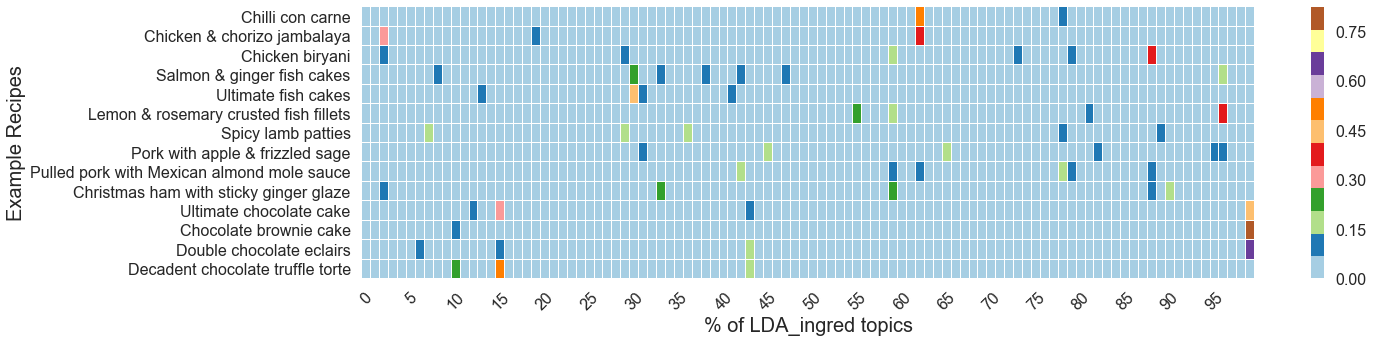

In [58]:
# plt.figure(figsize=(50,11))
sns.set_context("poster")
plt.figure(figsize=(20, 5))
# fig= sns.heatmap(iX_ldatrans, xticklabels=5, cmap = "Vega20c_r",linewidths=.005, vmin=0)#, vmax=0.75); #cmap = "viridis_r"
fig= sns.heatmap(iX_ldatrans, xticklabels=5, cmap = "Paired",linewidths=.005, vmin=0);#, vmax=.6); #cmap = "viridis_r"
# fig= sns.heatmap(iX_ldatrans, xticklabels=5, cmap='Reds',linewidths=.005, linecolor='white', vmin=0);#, vmax=1) #, center=1);
# fig.set_axis_()
sns.set(font_scale=0.6)
plt.xlabel('% of LDA_ingred topics', fontsize=20)
plt.ylabel('Example Recipes', fontsize=20)
plt.xticks(rotation=45) 
# plt.tick_params(axis='y', which='both', labelleft='off', labelright='on')



In [ ]:
## Old LDA but with upgraded python3 without extra stopwords

## concarne/jambalaya/mole
Topic 62:
tomato beef onion paprika pure sauc smoke oliv bean plum tortilla garlic worcestershir serv red


## chicken
Topic 2:
garlic clove chicken oliv breast onion stock parsley oregano tomato thigh leav butter boneless pearl

Topic 88:
cinnamon rice stick basmati pod cardamom klo-v toast serv rough turmer raisin leav miso butter

## herb/spice/flavour
Topic 59:
thyme leaf onion bay carrot butter celeri stock stick sprig garlic shallot chicken oliv parsley


##spicey
Topic 78:
chilli coriand cumin garlic red seed onion clove ground tomato oliv chickpea flake lemon turmer


## fish
Topic 96:
fillet fish skinless white haddock smoke cod firm parsley skin glass kay-per neck use undi

Topic 30:
lemon oliv babi spinach salmon leav parsley caper mayonnais watercress extra-virgin flat-leaf fine horseradish chive

Topic 55:
lemon mint oliv parsley cucumb couscous carrot prosciutto saffron courgett harissa kalamata wedg ka-rot apricot

## lamb
Topic 7:
dill lamb sour minc turkey bag egg bouillon onion melt cutlet 0.5*lemon lemon cream flour

##

## chocolatey
Topic 99:
sugar flour butter egg powder vanilla extract bake self-rais plain caster milk almond ice jam
Topic 15:
dark-chocol pomegran cocoa chocol powder good coffe mini marshmallow molass instant pink marsala qualiti tea
Topic 43:
cream doubl sugar vanilla milk butter strawberri biscuit pod egg-egg-yolk good-qual ice extract egg gelatin
Topic 10:
golden hazelnut syrup oat pear butter sugar blanch soda bicarbon cinnamon porridg ready-to-eat caramel see



In [ ]:
# ## New LDA with extra stopwords

# ## Fish
# Topic 46:
# fillet rice salmon basmati spring-onion skinless oliv butter glitter flatleaf fondant flower flour gluten-fre floret
# Topic 45:
# dill cream sour lemon horseradish salmon smoke fillet mackerel oliv trout serv cucumb spring-onion wedg
# Topic 57:
# mustard dijon watercress mayonnais white spring-onion crabmeat radish egg cucumb celeriac iceberg-lettuc buttermilk bag sourdough

# Topic 4:
# bread serv white crusti butter egg oliv spray clam sachet free-rang fraich food fondant flower


# ## Lamb
# Topic 25:
# lamb chickpea oliv lemon couscous mint onion tomato harissa coriand red past minc tahini leav

# ## Pork
# Topic 77:
# appl cider vinegar sugar roll bramley shoulder pork onion malt flesh torn cumberland joint waxi

# ## mole / chilli con carne
# Topic 51:
# tortilla bean red coriand tomato chilli onion lime kidney corn avocado chipotl cream sour past
# Topic 66:
# carrot celeri pure tomato stick onion oliv garlic stock haricot sugar flesh flower flour food
# Topic 98:
# cumin coriand ground garlic onion clove fenugreek sunflow ready-cook pickl crush pinto wing well see


# ##
# Topic 86:
# leaf bay peppercorn thyme leav onion butter young whole coars joint milk glace flesh food


# ## Chocolatey
# Topic 67:
# sugar flour powder egg butter self-rais bake caster milk cocoa extract plain vanilla dark-chocol ice
# Topic 33:
# cream doubl butter dark-chocol milk sugar whip serv egg coffe liqueur liquid glucos squar disaronno
# Topic 2:
# vanilla sugar extract cream ice serv custard raspberri butter bar milk egg clot dark-chocol strawberri
# Topic 8:
# brown sugar soft soda light bicarbon flour butter egg self-rais cinnamon treacl muscovado buttermilk sunflow

# ## Chicken
# Topic 63:
# chicken stock thigh onion garlic butter duck liver drumstick sunflow chorizo cornichon ring food fondant
# Topic 74:
# breast chicken boneless skinless oliv blue onion sunflow strip zest flour free-rang fraich food fondant
# Topic 78:
# coriand turmer chilli onion ginger garlic seed masala powder garam rice clove veget red tomato




In [ ]:
## you can retrieve by first transforming Ing.indred then selecting recipe indices later (instead of vice versa as above)

In [ ]:
iX_vec2 = itf_vectorizer.transform(Ing.ingred)
# print(iX_vec.shape) #(11, 741)

iX_ldatrans2 = pd.DataFrame(ilda_tf.transform(iX_vec2))

# iX_ldatrans2

In [ ]:
np.unique([ np.argmax(iX_ldatrans2[n]) for n in list(range(100)) ])

In [ ]:
iX_ldatrans2i = iX_ldatrans2.ix[[1,2,5,12,16,27,146, 555, 1224, 2317,4016,4986,6510,6996, 8998]]

iX_ldatrans2i.index = Ing.title.ix[[1,2,5,12,16,27,146, 555, 1224, 2317,4016,4986,6510,6996, 8998]]

# iX_ldatrans2i.transpose()

In [ ]:
# plt.figure(figsize=(50,11))
sns.set_context("poster")
plt.figure(figsize=(20, 5))
# fig= sns.heatmap(iX_ldatrans, xticklabels=10, cmap = "Paired",linewidths=.5);
fig= sns.heatmap(iX_ldatrans, xticklabels=5, cmap='Reds', linewidths=.005);
# fig.set_axis_()
sns.set(font_scale=0.6)
plt.xlabel('% of LDA_ingred topics', fontsize=20)
plt.ylabel('Example Recipes', fontsize=20)
plt.xticks(rotation=45) 
# plt.tick_params(axis='y', which='both', labelleft='off', labelright='on')


### Check for recipe similarities -- KNearestNeighbours

In [ ]:
Ing3 = pd.concat([Ing,DF.recipeLink,DF.imgURL], axis=1).reset_index()

In [ ]:
Ing3.head()

In [ ]:
# Ing3[Ing3.title == "Mexican chicken stew with quinoa & beans"]

In [ ]:
Ing3.ix[9199]
# Ing3.ix[3916]

In [ ]:
## USE ingredient LDA to find similar recipes:

iX_Avec = itf_vectorizer.transform(Ing3.ingred)
iX_ldaAtrans = pd.DataFrame(ilda_tf.transform(iX_Avec))

## iX_ldaAtrans.index = Ing.ingred.index

In [ ]:
# iX_ldaAtrans.iloc[3916]

### Use KNN

In [ ]:
from sklearn.neighbors import KDTree

In [ ]:
simtree = KDTree(np.array(iX_ldaAtrans), metric='euclidean' )
# simtree.valid_metrics

In [ ]:
dist,ind = simtree.query(np.array(iX_ldaAtrans.iloc[9199]),k=15) #3916 #1 #2#883 #5555 #100 #10030 #9518 XX4000 nope
# 2	2	Ultimate chocolate cake

In [ ]:
dist.tolist()[0]

In [ ]:
ind.tolist()[0]

In [ ]:
simTMP = Ing3.ix[ind.tolist()[0]]#.sort_values(by='prepDifficulty')
simTMP['KNNdist'] = dist.tolist()[0]
simTMP[['title','prepDifficulty','KNNdist','ingred']]#[1:]#.sort_values(by=['prepDifficulty','KNNdist'])


In [ ]:
simList = Ing3.ix[ind.tolist()[0]]#.sort_values(by=['prepDifficulty'])
simList.reset_index().imgURL[0]